# From Bits to Qubits
---

Quantum computers, or more precisely, quantum processing units (QPUs), are devices that exploit quantum-mechanical effects to perform computations that are not feasible through the use of conventional (classical) computers. In order to understand how these devices work, we must familiarize ourselves with the quantum phenomena that enables this added computational advantage. In particular, we must understand the concepts of [superposition](https://en.wikipedia.org/wiki/Quantum_superposition), [entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement) and [quantum interference](https://en.wikipedia.org/wiki/Wave_interference#Quantum_interference).

For this reason, in this chapter we will follow a bottom-up approach. Instead of starting our discussion about quantum computing by describing how QPUs can outperform classical devices in certain tasks, we will first introduce the concept of a qubit by showing how this fundamental element of computation emerges from some of the physical properties of particles like electrons.

## 1. Quantum Bits (Qubits)

From a computation standpoint, qubits are a generalization of classical bits and are the fundamental unit in quantum computing. There are many different ways in which we can introduce the concept of a qubit. Here, we will follow what I consider to be a relatively intuitive approach by looking at how electrons behave under the influence of an external magnetic field.

### 1.1 The Spin of an Electron

One of the fundamental properties of electrons is that they have an intrinsic angular momentum. This property is commonly known as spin, even though particles are not really spinning. The spin of an electron can be deduced experimentally by using what is known as a [Stern-Gerlach](https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment) apparatus. This device consists of two magnet poles shaped in a way such that the magnetic field between them is non-uniform, having a higher intensity at the top where the magnet is sharper: 

<img src="images/02_01_01_stern-gerlach_field.png" align = "center" width="600"/>

Therefore, if an object with a magnetic moment, like a tiny bar magnet, is sent into this device along the $y$ direction, it will experience a force in the vertical $z$ direction that will cause it to deflect upwards or downwards. A bar magnet with its north pole pointing up will deflect upwards; on the other hand, a bar magnet with its north pole pointing down will deflect downwards:

<img src="images/02_01_02_stern-gerlach_n-s_magnets.png" align = "center" width="700"/>

If designed correctly, a bar magnet with its north pointing in the $\texttt{+}x$ (or $\texttt{-}x$ direction) should experience an equal force from the top and bottom magnet poles, and therefore should travel in a straight path: 
<img src="images/02_01_03_stern-gerlach_straight_magnet.png" align = "center" width="300"/>


More generally, the force experienced by the bar magnet depends on the angle $\theta$ between its magnetic moment (i.e., where its north pole points to) and the direction of the external magnetic field. Therefore, if we were to perform this experiment for bar magnets with varying angles in the magnetic moment, the z-axis landing location on the back screen $l_z$ will vary between where the landing position of the up-pointing and down-pointing magnets, and will be dependent on the angle $\theta$ such that: $ l_z \propto cos\left(\theta\right) $.

<img src="images/02_01_04_stern-gerlach_diff_magnet.png" align = "center" width="320"/>

Replacing the value of $\theta$ for the few examples we considered above, we can see how the distance to the center of the screen $l_z$ depends on this angle:

| Bar's North Direction | Angle $\theta$ [rad] | Angle $\theta$ [deg] | $l_z \propto \cos(\theta)$ 
| :-: | :-: | :-: | :-: |
| $\texttt{+}z$ | $0$ | $0$ | $\phantom{\texttt{-}}1$ |
| $\texttt{-}z$ | $\pi$ | $180$ | $\texttt{-}1$ |
| $\texttt{+}x$ | $\frac{\pi}{2}$ | $90$ | $\phantom{\texttt{-}}0$ |
| $\texttt{-}x$ | $\frac{3\pi}{2}$ | $270$ | $\phantom{\texttt{-}}0$ |

Now, because electrons are charge particles, their intrinsic angular momentum (spin) expresses itself as a magnetic moment just as we have for a tiny bar magnet. So, if we were to replace the magnets with electrons in the experiment above[$^*$](#footnote), the expectation is that we should see the exact same behavior of electrons being deflected in the $z$ direction as a function of the angle between the electron's magnetic moment and the direction of the external magnetic field.

Experimentally, this has been confirmed for electrons with their spin pointing in the $\texttt{+}z$ and $\texttt{-}z$ directions:
<img src="images/02_01_05_stern-gerlach_up-down_elec.png" align = "center" width="700"/>

However, for the case of an electron with their spin pointing in the $\texttt{+}x$ (or $\texttt{-}x$) direction, something interesting happens. Instead of traveling in a straight line (like in the case of the bar magnet), the electron ends up deflecting upwards or downwards each with $50 \%$ probability:
<img src="images/02_01_06_stern-gerlach_right_elec.png" align = "center" width="360"/>

In other words, it has been verified that when this experiment is performed many times, roughly half of the time the electron deflects upwards, and half of the time it deflects downwards and never somewhere in between. More generally, what observations show is that the probability of the electron deflecting in the $\texttt{+}z$ direction is given by the cosine squared of the angle $\theta/2$, where again, $\theta$ is the angle between the spin and the direction of the magnetic field:

$$ P_{\texttt{+}z} = \cos^2\left(\frac{\theta}{2}\right) $$

Similarly, the probability of the electron deflecting in the $\texttt{-}z$ direction is equal the sine squared of the angle:

$$ P_{\texttt{-}z} = \sin^2\left(\frac{\theta}{2}\right) $$

From a probability standpoint, these expressions work since the sum of sine and cosine squared for any common angle always add to one, just like probabilities ought to do:

$$
\begin{aligned}
P_{\texttt{+}z} &+ P_{\texttt{-}z} = 1
\\
\\
\cos^2\left(\frac{\theta}{2}\right) &+ \sin^2\left(\frac{\theta}{2}\right) = 1
\end{aligned}
$$

Furthermore, we can verify that these expressions work for the four cases we have considered:

| Spin Direction | Angle $\theta$ [rad] | Angle $\theta$ [deg] | $P_{\texttt{+}z}$ | $P_{\texttt{0}z}$ |
| :-: | :-: | :-: | :-: | :-: |
| $\texttt{+}z$ | $0$ | $0$ | $1$ | $0$ |
| $\texttt{-}z$ | $\pi$ | $180$ | $0$ | $1$ |
| $\texttt{+}x$ | $\frac{\pi}{2}$ | $90$ | $\frac{1}{2}$ | $\frac{1}{2}$ |
| $\texttt{-}x$ | $\frac{3\pi}{2}$ | $270$ | $\frac{1}{2}$ | $\frac{1}{2}$ |

But more importantly, experiments simply show that this works for any angle $\theta$.
<img src="images/02_01_07_stern-gerlach_angle_elec.png" align = "center" width="360"/>
<br></br>

We can use Python to plot these probabilities $P_{\texttt{+}z}$, $P_{\texttt{-}z}$ as a function of $\theta$:

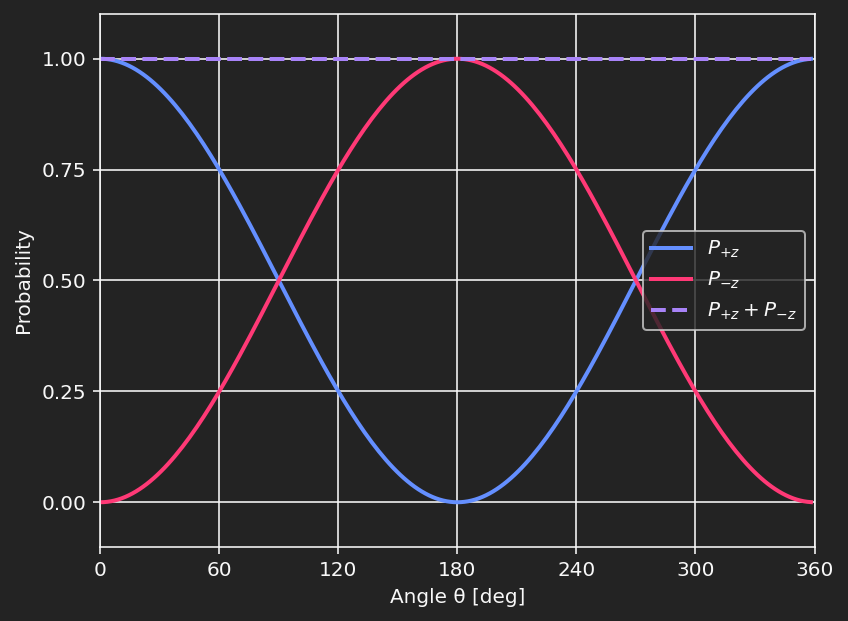

In [1]:
import numpy as np
from matplotlib import pyplot as plt

θ = np.arange(0,2*np.pi,np.pi/100)
Ppz = np.cos(θ/2)**2
Pmz = np.sin(θ/2)**2

plt.plot(180*θ/np.pi, Ppz, linewidth=2, label='$P_{+z}$')
plt.plot(180*θ/np.pi, Pmz, linewidth=2, label='$P_{-z}$')
plt.plot(180*θ/np.pi, Ppz+Pmz, '--', linewidth=2, label='$P_{+z}+P_{-z}$')

plt.xlim(0,360)
plt.xticks(np.arange(0, 361, 60))
plt.xlabel('Angle θ [deg]')
plt.ylim(-0.1,1.1)
plt.yticks(np.arange(0, 1.1, 0.25))
plt.ylabel('Probability')

plt.legend(loc='center right')
plt.grid()
plt.show()

The reason why electrons show this probabilistic behavior is partially related to what is perhaps the most debated question in all quantum mechanics: [the measurement problem](https://en.wikipedia.org/wiki/Measurement_problem). Since discussions about the measurement problem are outside the scope of this textbook, we will simply use the empirical evidence from these experiments to build a model for how to describe these particles.
<br></br>

So, given this observed behavior, it is then very tempting to assign a probability vector (like the ones described in the [previous chapter](../01_classical_computing/01_04_probabilistic_circuits.ipynb)) to describe the state of the spin of an electron, where to first element in the vector represents the probability of the electron being spin up, and the second element the probability of being spin down:

$$ 
\begin{aligned}
\vec{s} &= \begin{bmatrix}P_{\texttt{+}z} \\ P_{\texttt{-}z} \end{bmatrix} 
\\
\\
\vec{s} &= \begin{bmatrix}\cos^2\left(\frac{\theta}{2}\right) \\ \sin^2\left(\frac{\theta}{2}\right) \end{bmatrix} 
\end{aligned}
$$

Clearly, this works for the specific case of the Stern-Gerlach experiment we described above, but does it work in general?... 
<br></br>
<div style="text-align: center;"> <strong> ¡No! </strong> </div>

To see why, let's first write what the probability vectors for a spin-up and spin-down electron in the $z$ direction would be:

$$
\vec{s}_{\texttt{+}z} = \begin{bmatrix}1 \\ 0 \end{bmatrix}, \quad \vec{s}_{\texttt{-}z} = \begin{bmatrix}0 \\ 1 \end{bmatrix}. 
$$

Now, for an electron with spin pointing in the $\texttt{+}x$ direction, the probability of measuring is spin up and spin down is $1/2$ each, so we have:

$$
\vec{s}_{\texttt{+}x} = \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix}.
$$

But what about an electron with spin in the $\texttt{-}x$ direction? Well, this would give us the exact same vector as above, which means there would be no way of distinguishing between two clearly different states:

$$
\vec{s}_{\texttt{-}x} = \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix}
$$

One could argue that, perhaps, there is just simply no way to experimentally distinguish between electrons with spins along the $\texttt{+}x$ and $\texttt{-}x$ directions. However, it is not difficult to see that there is really nothing special about setting up the Stern-Gerlach apparatus with its varying field along the $z$ axis. We can perfectly rotate the device so the field is now in the $x$ direction. And, if we now send electrons with their spin along the $\texttt{+}x$ (or $\texttt{-}x$) axis, we will see them deflect to the right (or to the left) accordingly, which shows that there is indeed a way to experimentally tell these are two different states:

<img src="images/02_01_08_stern-gerlach_left-right_elec.png" align = "center" width="700"/>
<br></br>

Furthermore, we can also show that, mathematically, using probability vectors to describe spins simply doesn't work. An interesting fact about using vectors is that we can write one particular state as a linear combination of other states. For example, an electron with spin pointing in the $\texttt{+}x$ direction can be written as a linear combination of $\vec{s}_{\texttt{+}z}$ and $\vec{s}_{\texttt{-}z}$:

$$
\begin{aligned}
\vec{s}_{\texttt{+}x} &= \frac{1}{2} \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
\vec{s}_{\texttt{+}x} &= \frac{1}{2} \vec{s}_{\texttt{+}z} + \frac{1}{2} \vec{s}_{\texttt{-}z}.
\end{aligned}
$$

In words, this expression is simply saying that an electron in the $\texttt{+}x$ can be interpreted as either having an electron with spin in the $\texttt{+}z$ direction or in the $\texttt{-}z$ direction, each with $50\%$ probability. By symmetry, we also know that if we send spin-up electrons through a rotated Stern-Gerlach apparatus, we will see them deflecting left or right, each with $50\%$ probability:

<img src="images/02_01_09_stern-gerlach_up_elec.png" align = "center" width="360"/>

This means that, for an electron with spin pointing in the $\texttt{+}z$ direction, we should also be able to write it as a linear combination of the vectors $\vec{s}_{\texttt{+}x}$ and $\vec{s}_{\texttt{-}x}$:

$$
\vec{s}_{\texttt{+}z} = \frac{1}{2} \vec{s}_{\texttt{+}x} + \frac{1}{2} \vec{s}_{\texttt{-}x}.
$$

But what happens if we replace $\vec{s}_{\texttt{+}x}$ and $\vec{s}_{\texttt{-}x}$ with the vector representation? Ideally, we should recover the vector expression for $\vec{s}_{\texttt{+}z}$, but this is what we get instead:

$$
\begin{aligned}
\vec{s}_{\texttt{+}z} &= \frac{1}{2} \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix} + \frac{1}{2} \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix}
\\
\\
\vec{s}_{\texttt{+}z} &= \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix},
\end{aligned}
$$

which is clearly not consistent with our original definition for $\vec{s}_{\texttt{+}z}$: 

$$ \vec{s}_{\texttt{+}z} = \begin{bmatrix}1 \\ 0 \end{bmatrix}. $$

This contradiction basically shows that probability vectors are not the right tool to represent how the spin of an electron behaves, so we need an alternative description. So let us now try to intuit how the mathematical object that describes the angular momentum of an electron would have to look like to match the results from these experiments.

### 1.2 Generalizing Probability Vectors

A key observation from the probabilistic model we proposed above is that, since the components of the vectors we have used so far are probabilities (which are always numbers between $0$ and $1$), there is simply no way we can recover the original vector that describes $\vec{s}_{\texttt{+}z}$ by using linear combinations of other probability vectors. This is because the second entry in this vector is a $0$, so there are no two positive numbers that can add up to it (unless they are both $0$). What this implies is that, for our maths to work, we need to also allow **negative** entries in our vectors. However, since these vectors still need to describe probabilistic experimental results and probabilities cannot be negative, we need a new rule that tells us how to relate these new vector elements to probabilities. Well, a simple recipe to turn negative numbers into positive numbers is to square them, so we could propose to have the elements of our vectors to be numbers that when squared turn into the probabilities we see in experimental results! It is not hard to see that, a vector that would work in the case of the Stern-Gerlach experiment is given by:

$$ 
\begin{aligned}
|s \rangle = &\begin{bmatrix} s_0 \\ s_1 \end{bmatrix} 
\\
\\
|s \rangle = &\begin{bmatrix}\cos \left(\frac{\theta}{2}\right) \\ \sin \left(\frac{\theta}{2}\right) \end{bmatrix} .
\end{aligned}
$$

Notice how here we have switched back to using ket notation for our vectors. This is because, as we pointed out in the previous chapter, for any angle $\theta$, the norm of $|s \rangle$ is always $1$. We then call $s_0$ and $s_1$ the **probability amplitudes** of $|s \rangle$ which, when squared, represent the probabilities of measuring the electron to be spin up or spin down:

$$ P_{\texttt{+}z} = s_0^2 \,, \quad P_{\texttt{-}z} = s_1^2 .$$

The key here is that, unlike what we had for the probability vector $\vec{s}$, this new definition does align with the observations of how the spin of electrons behave. To see this, let's reconsider an electron with spin pointing in the $\texttt{+}z$ direction:

$$ |s_{\texttt{+}z} \rangle = \begin{bmatrix}\cos \left(\frac{0}{2}\right) \\ \sin \left(\frac{0}{2}\right) \end{bmatrix} = \begin{bmatrix}1 \\ 0 \end{bmatrix}, $$

and $\texttt{-}z$ direction:

$$ |s_{\texttt{-}z} \rangle = \begin{bmatrix}\cos \left(\frac{\pi}{2}\right) \\ \sin \left(\frac{\pi}{2}\right) \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}. $$

Next, let's look at the the vectors for the spin in the $\texttt{+}x$ and $\texttt{-}x$ directions:

$$ 
\begin{aligned}
|s_{\texttt{+}x} \rangle = \begin{bmatrix}\cos \left(\frac{\pi/2}{2}\right) \\ \sin \left(\frac{\pi/2}{2}\right) \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} ,
\\
\\
|s_{\texttt{-}x} \rangle = \begin{bmatrix}\cos \left(\frac{\pi/2}{2}\right) \\ \sin \left(\frac{\pi/2}{2}\right) \end{bmatrix} = \begin{bmatrix} \phantom{\text{-}}\frac{1}{\sqrt{2}} \\ \text{-}\frac{1}{\sqrt{2}} \end{bmatrix} .
\end{aligned}
$$

As pointed out previously, we can express these vectors as linear combinations of other vectors. So, for the case of $|s_{\texttt{+}x} \rangle$ we have:

$$ 
\begin{aligned}
|s_{\texttt{+}x} \rangle &= \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} 
\\
\\
|s_{\texttt{+}x} \rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
|s_{\texttt{+}x} \rangle &= \frac{1}{\sqrt{2}} |s_{\texttt{+}z} \rangle + \frac{1}{\sqrt{2}} |s_{\texttt{-}z} \rangle
\end{aligned}
$$

And, as mentioned before, due to the symmetry of rotation the experiment have, we should be able to the same for $|s_{\texttt{+}z} \rangle$ in term of $|s_{\texttt{+}x}\rangle$ and $|s_{\texttt{-}x}\rangle$ and recover its original definition:

$$
\begin{aligned}
|s_{\texttt{+}z} \rangle &= \frac{1}{\sqrt{2}} |s_{\texttt{+}x} \rangle + \frac{1}{\sqrt{2}} |s_{\texttt{-}x} \rangle 
\\
\\
|s_{\texttt{+}z} \rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} + \frac{1}{\sqrt{2}} \begin{bmatrix} \phantom{\text{-}}\frac{1}{\sqrt{2}} \\ \text{-}\frac{1}{\sqrt{2}} \end{bmatrix}
\\
\\
|s_{\texttt{+}z} \rangle &= \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \end{bmatrix} + \begin{bmatrix} \phantom{\text{-}}\frac{1}{2} \\ \text{-}\frac{1}{2} \end{bmatrix}
\\
\\
|s_{\texttt{+}z} \rangle &= \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
\end{aligned}
$$

<div style="text-align: center;"> <strong> ¡Success! </strong> </div>

We have managed to find a model that describes not only the probabilistic results for the spin of an electron when measured along the $z$ direction, but that also preserves the original definitions of the spin vectors when the apparatus is oriented at other angles.

So, from what we observe in this experiment, it can be concluded that the spin of an electron can be described by a vector of the form:

$$ |s \rangle = \begin{bmatrix} s_0 \\ s_1 \end{bmatrix}, $$

where $s_0$ and $s_1$ are real numbers ($s_0, s_1 \in \mathbb{R}$), whose values squared represent probabilities and must therefore add up to 1:

$$ s_0^2 + s_1^2 = 1. $$

Now, unfortunately, this is not the whole story. This description works well in the case of the Stern-Gerlach experiment because electrons are traveling along the $y$ axis, and we are only concerned about their orientation in the $x/z$ plane. However, the spin of an electron can **also** point along the $\texttt{+}y$ and $\texttt{-}y$ axes. So how would we express these state vectors and still preserve all the properties we have described so far?
<br></br>
<div style="text-align: center;"> <strong> ¡Complex Numbers to the Rescue! </strong> </div>

<a name="footnote"></a><span style="font-size: smaller;">$^*$**Footnote**: Technically, we can't really perform the standard Stern-Gerlach experiment using just electrons. Since electrons are charged particles, accelerating them into the apparatus will cause a classical [Lorentz force](https://en.wikipedia.org/wiki/Lorentz_force) that will dominate over the effect the magnetic field has on spin. Instead, in the [original experiment](https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment#Description), silver atoms where used because they are electrically neutral but still have the same spin behavior as electrons (spin-1/2) due to the presence of an unpaired electron in the outermost orbital.

### Talk about them being complex-valued

### Mention they that the reason why they need to be complex will become obvious is a sec (when we talk about the y axis).

### Talk about their norm squared being the probabilities

### Talk about the sum of the norm square still following probability rules

Instead, the spin of an electron requires its own mathematical object known as a . We won't go into the formal description of spinors, but 


The first person to realize this was [Max Born](https://en.wikipedia.org/wiki/Max_Born), who proposed that 
This was precisely what Max Born realized soon after he came up with 


Formally, the angular momentum of an electron is actually described by a mathematical object known as a [spinor](https://en.wikipedia.org/wiki/Spinor). However, at this point we do not need to worry too much about all the complex structure that describes these 